**Name: ZHANG XINJIE**

**Student ID Number: 20M14457**

**E-mail: zhang.x.az@m.titech.ac.jp**

# 演習８　勾配降下法

## 課題
行列$A$およびベクトル$b$が既知のとき，以下の最小二乗法

$x^* = \arg\min_x ||Ax-b||_2^2$

を勾配降下法を用いて未知の$x^*$を求めるアルゴリズムを実装せよ．初期値は$x=(3,3)^\top$とし，勾配降下のステップサイズは$\tau=0.1$とする．

## 追加課題
余裕のあるものは，反復ごとの$x_1, x_2$を保存しておいて，反復によるこれらの変数の変化をグラフにせよ．さらに，$\tau$を変えてこのグラフがどうなるか観察せよ．

For nonlinear programming problem, it is difficult to find a optimal solution by finite computation. The optimal solution is expected to be obtained by generating a sequence of points ${\{x^{(k)}\}}$ that converge to the optimal one. 

For a convex function $f$, the global optimum can be obtained by Gradient Descent Method, which the gradient vector $\nabla f(x^{(k)})$ leads to the direction that the value of the object function will increase or decrease to the optimum point. 

Here, the parameter $\alpha$ is proposed as the step to control the speed of converging.  By choosing an appropriate starting point $x(0)$, and generating the next point by 
$$x^{(k+1)} = x^{(k)} - \alpha ^{(k)}\nabla f(x^{(k)})$$
iteratively, the optimal solution can be obtained.

In machine learning, this problem can be considered as linear regression with one variable. Thus, the matrix A must contains one more column of 1 for convenience of computation.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = np.c_[np.asarray([21.3, 22, 26.9, 32.3, 33.1, 38.2])/100]
b = np.c_[np.asarray([116.5, 125.5, 128.1, 132, 141, 145.2])/100]
A = np.concatenate([np.ones([6,1]), a], axis=1)

ATA = np.matmul(A.T, A)
ATb = np.matmul(A.T, b)
# ソルバで解いた解x(デバッグ用)
tx = np.linalg.solve(ATA, ATb)
print(tx)

tau = 0.1 #勾配降下のステップサイズ
#tau == alpha 
Niter = 5000 # 反復回数

# xの初期値
x = np.c_[np.asarray([3, 3])]


[[0.88743422]
 [1.47203377]]


In this case, the objective function is $f(x) = ||Ax - b||^2_2$.

In [2]:
# In machine learning, the function usually is called as cost function or loss function.
def computeCost(A, b, x):
  return sum((A.dot(x)-b)**2)

In [3]:
# The parameters are the observed variables, the predictions, the starting point
# step, and number of iterations.

# The parameters that could be used to predict are expected to be obtained.

def gradientDescent(A, b, x, alpha, Niter): 
  xtmp = x
  J_history = np.zeros((Niter, 1))
  x_history = np.zeros((Niter, 2, 1))

  for iter in range(Niter):
    #tmp_x0 = x[0] - alpha * sum(A.dot(x)-b)
    tmp_x0 = xtmp[0] - alpha * sum(A.dot(xtmp)-b)
    #tmp_x1 = x[1] - alpha * sum(np.multiply(A.dot(x) - b, A[:,1].reshape(-1,1)))
    tmp_x1 = xtmp[1] - alpha * sum(np.multiply(A.dot(xtmp) - b, A[:,1].reshape(-1,1)))

    xtmp = np.array([tmp_x0, tmp_x1])
    x_history[iter] = xtmp
    #print(xtmp)
    J_history[iter] = computeCost(A, b, xtmp)
  
  return xtmp, J_history, x_history

In [4]:
x_final, JHistory, xHistory = gradientDescent(A, b, x, tau, Niter)
print(x_final)

[[0.88742668]
 [1.47205971]]


The final result of iteration is very close to direct solution, meaning it is correct. 

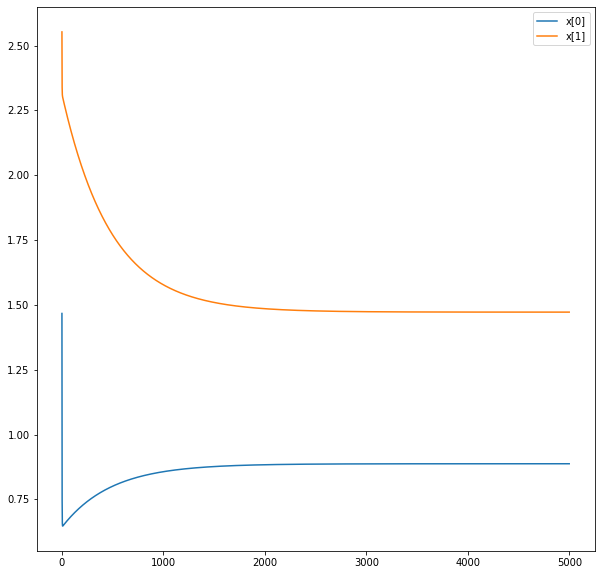

In [5]:
# Plot the x[0], x[1] changes as the iterations increase.
# They finally converge to a number.

plt.figure(figsize=(10,10))
l1 = plt.plot(list(range(Niter)),list(xHistory[:,0]), label = "x[0]")
l2 = plt.plot(list(range(Niter)),list(xHistory[:,1]), label = "x[1]")
plt.legend()
plt.show()

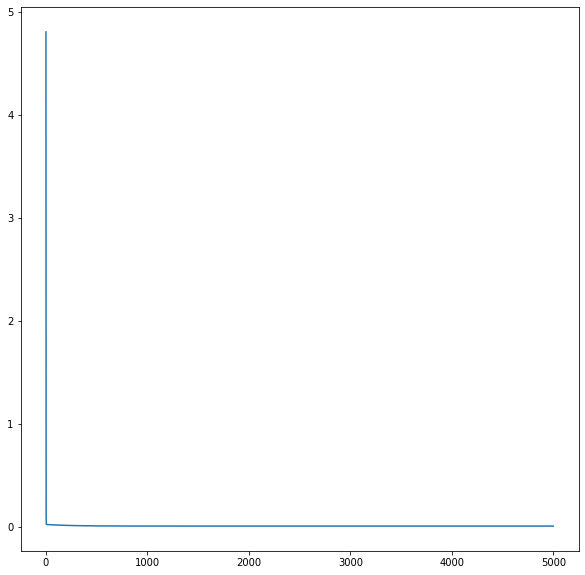

In [ ]:
# Plot the object function changes as the iterations increase.

plt.figure(figsize=(10,10))
plt.plot(list(range(Niter)),list(JHistory[:,0]))

In [6]:
# Change the step to a smaller number, meaning the object function may converge slowly.

alpha = 0.01

xfinal_, JHistory_, xHistory_ = gradientDescent(A, b, x, alpha, Niter)
print(xfinal_)

[[0.80067302]
 [1.77051845]]


The result is not as good as that when using a larger step.

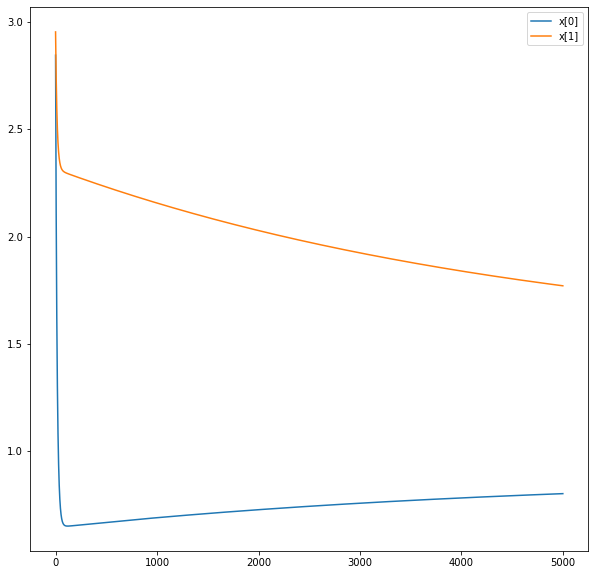

In [8]:
#Plot of x[0], x[1]

plt.figure(figsize=(10,10))
l3 = plt.plot(list(range(Niter)),list(xHistory_[:,0]), label = "x[0]")
l4 = plt.plot(list(range(Niter)),list(xHistory_[:,1]), label = "x[1]")
plt.legend()
plt.show()

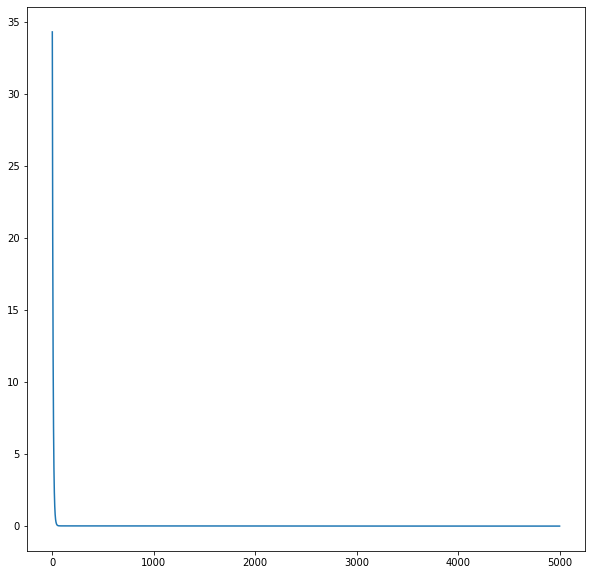

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(list(range(Niter)),list(JHistory_[:,0]))

# 演習１０　Chambolleによるtotal variation(TV)最小化アルゴリズムの実装

## 課題
観測モデル$u_0 = \hat{u}+n$に従う観測画像$u_0$が与えられているとする．Chambolleらの提案したTV最小化の数値計算アルゴリズムにより，ノイズ除去を行い（$u_0$に近いことが期待できる）推定画像$u$を求める手法を実装せよ．

Image denosing is a typical inverse problem, of which the selection of regularization terms is very important. For a unknown image $\hat{\pmb{u}}$, the observed model is $\pmb{u}_0$:
$$\pmb{u}_0 = K \hat{\pmb{u}} + \pmb{n}$$

Total Variation is a regularization introduced by Rudin, Osher, and Fatemi, and the following formula is called as ROF model. 

$$ \pmb{u^*} = \mathop{\arg\min_{\pmb{u}} \frac{1}{2\lambda}||\pmb{u_0} - \pmb{u}||^2_2 + ||D\pmb{u}||_{1,2}} $$ 

$ D: \mathbb{R}^N \rightarrow \mathbb{R}^{2N}$ is the discrete gradient operator for position $(i,j)$ in the image. And $||D\pmb{u}||_{1,2} $ is called as TV norm. In this view, the image denoising is performed as an infinite-dimensional minimization problem. 

Chambolle proposed a dual-formulation-based projection algorithm for TV-denoising. The ROF model can be represented as 

$$\mathop{\min_{\pmb{u}}} \frac{1}{2\lambda}||\pmb{u_0} - \pmb{u}||^2_2 + \mathop{\max_{\pmb{p}}}<D^T \pmb{p}, \pmb{u}>$$

where the $D^T: \mathbb{R}^{2N} \rightarrow \mathbb{R}^{N}$ is the conjugate operator that forms the following equation:
$$<\pmb{p}, D\pmb{u}> = <D^T\pmb{p}, \pmb{u}>$$

To simplify, with gradient direction $-D(D^T\pmb{p} - \frac{\pmb{u_0}}{\lambda})$, the pixels in the denoised image can be obtained using projected gradient method:

$$\pmb{p}_{i,j}^{k+1} = \frac{\pmb{p}_{i,j}^k - \tau((D(D^T\pmb{p}^k - \frac{\pmb{u_0}}{\lambda})))_{i,j}}{max{\{1, |\pmb{p}_{i,j}^k - \tau((D(D^T\pmb{p}^k - \frac{\pmb{u_0}}{\lambda})))_{i,j}|\}}}$$

where $|\pmb{z}| := \sqrt{(\pmb{z}_1)^2 + (\pmb{z}_2)^2}$

The denoised image is obtained by:
$$\hat{\pmb{u}} = \pmb{u}_0 - \lambda D^T\pmb{p}$$

In [10]:
!git clone https://github.com/mdipcit/standard_images/

Cloning into 'standard_images'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [11]:
cd standard_images/

/content/standard_images


In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image
from numpy import *

Define operator $D$ and $D^T$. 

In [13]:
def D(im):
    h, w = im.shape 
    dh = np.concatenate([im[1:, :] - im[0:-1, :], \
        np.zeros([1, w])], axis=0) 
    dw = np.concatenate([im[:, 1:] - im[:, 0:-1], \
        np.zeros([h, 1])], axis=1) 
    return np.dstack([dh, dw])

def Dt(p):
    h, w, _ = p.shape
    return np.concatenate([-p[0, :, 0].reshape([1, w]), -p[1:-1, :, 0]\
         + p[0:-2, :, 0], p[-2, :, 0].reshape([1, w])], axis = 0) \
         + np.concatenate([-p[:, 0, 1].reshape([h, 1]), -p[:, 1:-1, 1]\
         + p[:, 0:-2, 1], p[:, -2, 1].reshape([h, 1])], axis = 1)


Define the calculation of signal-to-noise ratio. High signal-to-noise ratio will be obtained if denoising is well done. 

In [14]:
def PSNR(im1, im2):
    return 10*np.log10(1/np.mean((im1-im2)**2))

In [15]:
uh= np.asarray(Image.open('pepper.png')).astype(float)/255.0
h, w = uh.shape 
sig = 10/255
u0 = uh + np.random.randn(h, w) * sig
print(PSNR(uh, u0))

28.100653200424873


In [16]:
# initialization
tau=0.9/4 #反復法の勾配降下のパラメータτ
lamb = 0.03 #目的関数（式(15))中の正則化項の重みλ
Niter = 100 #反復回数
# 反復中で使う変数を初期化
p = np.zeros([h, w, 2])

# Make a list of error to record the difference of updated U and previous U
error = list(range(Niter))

# The parameters include the obeseved image, the initializaed p, 
# the initial U, the gradient parameter tau, the weight of regularization,
# and the number of iterations
def denoise(im, p, U_init, tau, lamb, Niter):
  h, w = im.shape 

  U = U_init
  Px = p[:,:,0]
  Py = p[:,:,1]

  for i in range(Niter):
  # Chambolle's iteration
  #for i in range(Niter):
  # ここにpの更新の式を書く
    Uold = U 
    
    # The gradient of rows and columns is calculated separately
    GradUx = D(Dt(p) - im / lamb)[:,:,0]
    GradUy = D(Dt(p) - im / lamb)[:,:,1]

    PxNew = Px - tau * GradUx
    PyNew = Py - tau * GradUy

    NormNew = maximum(1, sqrt(PxNew**2+PyNew**2))

    Px = PxNew/NormNew 
    Py = PyNew/NormNew

    p = np.dstack([Px, Py])
    

    #---dual→primal
    #u= u0 - lamb*Dt(p)
    U = im - lamb * Dt(p)

    error[i] = linalg.norm(U-Uold) / sqrt(h*w)

  return U, error


In [17]:
u, error = denoise(u0, p, u0, tau, lamb, Niter)

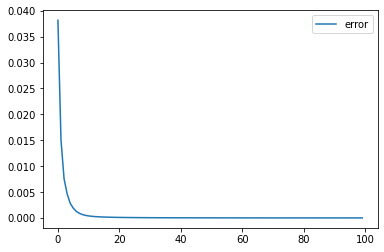

In [18]:
plt.plot(list(range(Niter)),error, label = 'error')
plt.legend()

33.42813939954505


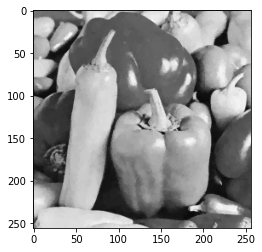

In [19]:
print(PSNR(uh,u))
plt.imshow(u, cmap='gray')

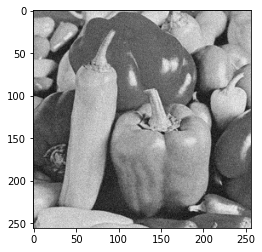

In [ ]:
plt.imshow(u0, cmap='gray')

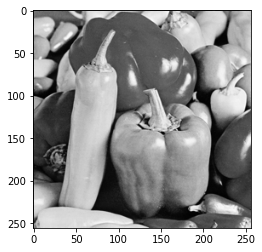

In [20]:
plt.imshow(uh, cmap='gray')

The image u0 is well denoised.